# TODO

- write function for undo zscore to see cluster centers in terms of the value not the zscore (this would be pretty great and not hard with a bit of focus)
 - X = Z * std - mean
- write function for creating a pdf for bonus points

In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from pandas.tools.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
plt.switch_backend('MacOSX') 

In [4]:
csv = pd.read_csv("amb_selec3.csv") #import the file of users and their features, pulled from BigQuery
fs = '3' #feature set version

csv = csv.loc[csv['recd_praises']>1,].dropna().reset_index(drop=True) # threshold on feature, drop rows with na values
strip = csv[(np.abs(stats.zscore(csv)) < 3).all(axis=1)].reset_index(drop=True) # remove crazy outliers
drop = pd.concat([pd.DataFrame(strip.iloc[:,1:3]), pd.DataFrame(strip.iloc[:,4:7])], axis = 1, join_axes = [strip.index])# drop the user_ids and any other features you wish to discard
data = pd.DataFrame(scale(drop)) # use this for < 4D
data3D = pd.DataFrame(PCA(n_components=3).fit_transform(data)) # Reduce dimensions from 4 to 3 for visualization
data2D = pd.DataFrame(PCA(n_components=2).fit_transform(data)) # Reduce dimensions from 4 to 2 for visualization

# run kmeans with 10 sets of clusters seeds
# extract classification labels and cluster centers 
# do some prep for vizualization
def cluster_it_up(N):
    kmeans = KMeans(init = 'k-means++', n_clusters = N, n_init = 100).fit(data) # it's as easy as a function call
    labels = pd.DataFrame((kmeans.labels_)) # extract labels
    centers = pd.DataFrame(kmeans.cluster_centers_) # extract centers
    centers.columns = drop.columns # give centers table readable column names
    labels.columns = ['label'] 
    clust_out = pd.concat([strip, labels], axis=1, join_axes = [strip.index]) # make DataFrame that is labeled users and their features
    viz3D = pd.concat([data, labels], axis = 1, join_axes = [data.index]) 
    viz2D = pd.concat([data2D, labels], axis = 1, join_axes = [data2D.index])
    return clust_out, centers, N, strip, data, labels, viz3D, viz2D

FileNotFoundError: File b'amb_selec3.csv' does not exist

In [1]:
data

NameError: name 'data' is not defined

In [5]:
clust_out.to_csv('~/Google Drive/ambassador_selection/' + str(N) + '_clus_fs' + fs + '.csv')

NameError: name 'clust_out' is not defined

In [105]:
clust_out, centers, N, strip, data, labels, viz3D, viz2D  = cluster_it_up(5)

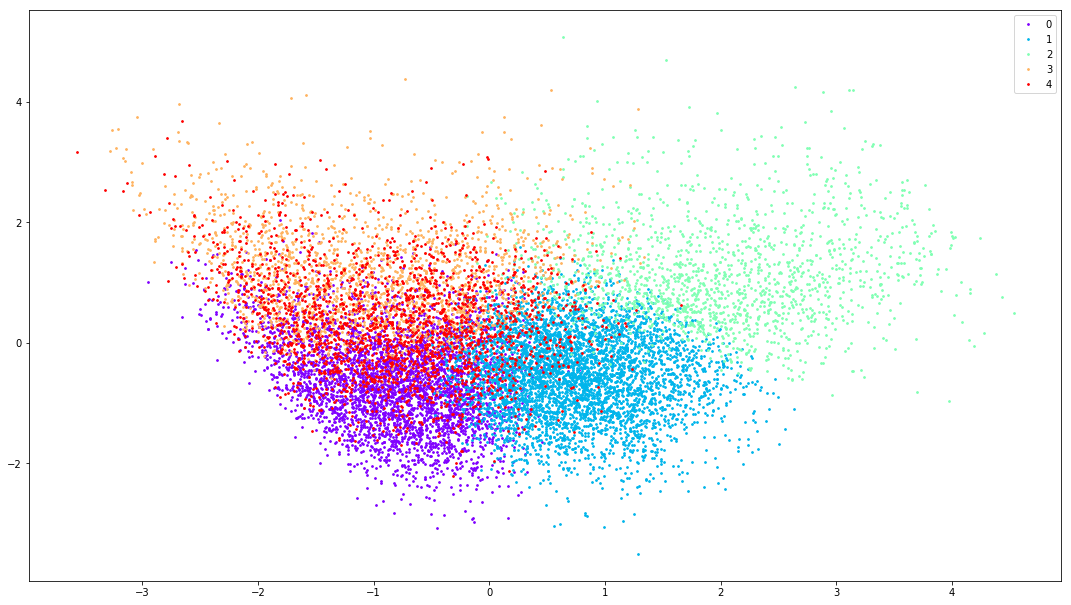

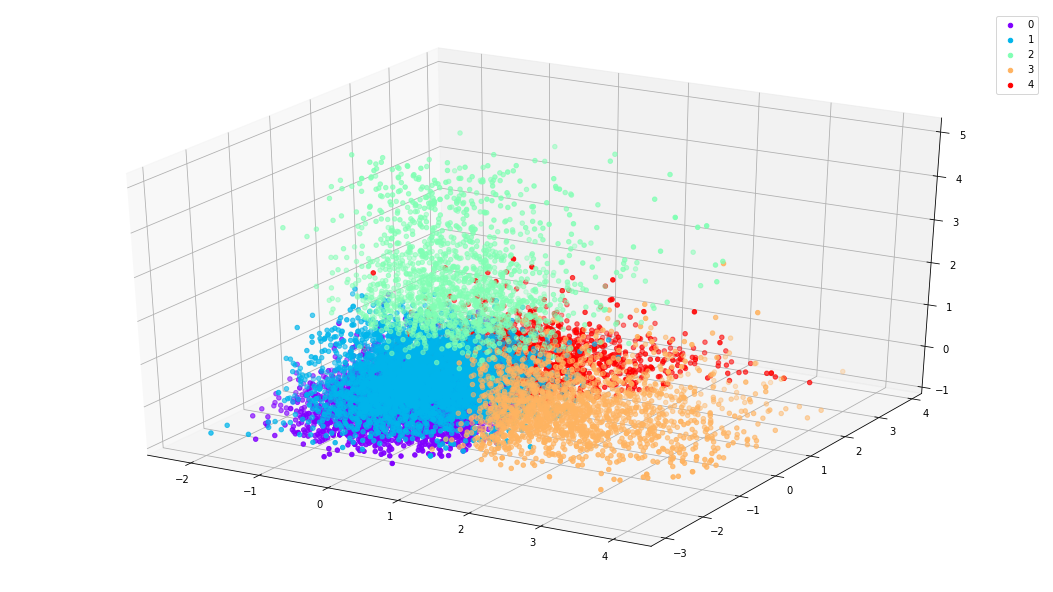

,recd_praises,avg_comment_length,praise_length,active_days,comments_per_item,sum
0,-0.482677,-0.426084,-0.565605,-0.853783,0.277871,-2.050278
1,-0.074256,-0.341319,-0.250900,0.776964,-0.530824,-0.420336
2,2.260745,0.039107,-0.037945,0.995185,0.110038,3.367130
3,-0.303532,1.735201,-0.043342,-0.470730,0.474072,1.391670
4,-0.443083,-0.110367,1.667918,-0.465697,0.119129,0.767901


In [106]:
%matplotlib inline
colors = plt.cm.rainbow(np.linspace(0, 1, len(centers)))

#2D viz
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
for i,c in enumerate(colors):
    single_clus = viz2D.loc[viz2D['label'] == i]
    plt.scatter(single_clus[0], single_clus[1], s=3, c = c, label=str(i))
plt.legend()
plt.show()

#3D viz
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(111, projection='3d')
for i,c in enumerate(colors):
    single_clus = viz3D.loc[viz3D['label'] == i]
    ax.scatter(single_clus[1], single_clus[2], single_clus[0], s=20, c = c, label=str(i))
plt.legend()
plt.show()

#scatter matrix
#scatter_matrix(data, alpha=0.1, figsize=(6, 6), diagonal='kde')
#plt.show()

centers['sum'] = centers.sum(axis = 1)
centers

In [89]:
data.shape

(13953, 5)

In [96]:
good_clus = pd.DataFrame(clust_out.loc[clust_out['label'] == 1]).reset_index(drop = True) 
good_clus.sort_values(by = ['praise_length'], ascending = [False], inplace = True)
good_clus

,user_id,recd_praises,avg_comment_length,about_length,praise_length,active_days,comments_per_item,label
1823,832926,3.0,49.0,0,106.0,169.0,1.222222,1
2008,656699,2.0,62.0,0,106.0,173.0,1.662338,1
2007,2361457,4.0,62.0,0,106.0,141.0,1.218447,1
1821,1727632,3.0,49.0,0,106.0,153.0,1.691358,1
1243,3215599,3.0,37.0,0,106.0,104.0,1.216216,1
2032,3175825,3.0,67.0,0,106.0,27.0,1.818182,1
1833,1862424,3.0,50.0,0,106.0,58.0,1.647059,1
1841,3335880,6.0,50.0,0,106.0,97.0,1.859155,1
1377,2435169,2.0,39.0,0,106.0,141.0,1.666667,1
1476,2703786,5.0,41.0,0,106.0,127.0,2.000000,1
